# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# from citipy import citipy

from citipy import citipy 

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

In [49]:
# Create placeholders to hold values

cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []
sun_rise = []
sun_set = []

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [51]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
# query_url

i = 1
for city in cities:
    response = requests.get(query_url + city).json()
   #  cities.append(response['city']['country'])
    
    
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        sun_rise.append(response["sys"]["sunrise"])
        sun_set.append(response["sys"]["sunset"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("Sorry NO City Found. skipping.")

Beginning Data Retrieval 
-----------------------------
Processing record 1|qaanaaq
Sorry NO City Found. skipping.
Processing record 2|new norfolk
Sorry NO City Found. skipping.
Processing record 3|victoria
Sorry NO City Found. skipping.
Processing record 4|tuktoyaktuk
Processing record 5|atuona
Processing record 6|thompson
Processing record 7|souillac
Processing record 8|puerto ayora
Sorry NO City Found. skipping.
Sorry NO City Found. skipping.
Processing record 9|albany
Processing record 10|gangarampur
Processing record 11|bengkulu
Processing record 12|fare
Processing record 13|mahebourg
Processing record 14|port alfred
Processing record 15|mataura
Processing record 16|punta arenas
Sorry NO City Found. skipping.
Processing record 17|khatanga
Processing record 18|los llanos de aridane
Processing record 19|talnakh
Processing record 20|kapaa
Processing record 21|esperance
Processing record 22|rikitea
Processing record 23|busselton
Processing record 24|laguna
Processing record 25|cabo sa

Processing record 240|abay
Sorry NO City Found. skipping.
Processing record 241|beringovskiy
Processing record 242|wodonga
Processing record 243|butaritari
Sorry NO City Found. skipping.
Processing record 244|ambulu
Processing record 245|fairbanks
Processing record 246|kidal
Processing record 247|katsuura
Processing record 248|quesnel
Sorry NO City Found. skipping.
Processing record 249|caravelas
Processing record 250|biryusinsk
Processing record 251|henties bay
Processing record 252|alice springs
Processing record 253|alliance
Processing record 254|soyo
Processing record 255|urmary
Processing record 256|marsa matruh
Processing record 257|urumqi
Processing record 258|cockburn town
Processing record 259|san isidro
Processing record 260|zaysan
Processing record 261|superior
Sorry NO City Found. skipping.
Sorry NO City Found. skipping.
Processing record 262|shwebo
Processing record 263|kuznetsk
Processing record 264|tocopilla
Processing record 265|nanortalik
Processing record 266|triunfo


Processing record 479|mango
Processing record 480|lazaro cardenas
Processing record 481|ustka
Processing record 482|amuntai
Processing record 483|talcahuano
Sorry NO City Found. skipping.
Processing record 484|naron
Processing record 485|yuncheng
Processing record 486|barcarena
Processing record 487|pontalina
Processing record 488|kavkazskiy
Processing record 489|cassia
Processing record 490|namibe
Processing record 491|omaruru
Processing record 492|kharan
Processing record 493|zadonsk
Processing record 494|yuli
Processing record 495|santa maria
Processing record 496|byron bay
Processing record 497|luau
Processing record 498|ust-tsilma
Processing record 499|kemijarvi
Processing record 500|mayumba
Processing record 501|buchanan
Processing record 502|morgan city
Processing record 503|bela
Sorry NO City Found. skipping.
Processing record 504|husavik
Processing record 505|baykit
Processing record 506|kamenka
Processing record 507|kerema
Processing record 508|moengo
Processing record 509|mo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [66]:
# create a data frame from cities, lat, and temp
weather_glossary = {
    #"city": cities,
    #"lat": lat,
    #"temp": temp
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Max_Temp": max_temp,        
    "Humidity": humidity,
    "Lat": lat,  
    "Lng": lng,
    "City": city_name,
    "Wind Speed": wind_speed,
    "Sun Rise": sun_rise,
    "Sun Set": sun_set
        
}
weather_detail = pd.DataFrame(weather_glossary)

#Exporting data to csv
weather_detail.to_csv(r'C:\Users\kerry\DataBootCamp\python-api-challenge\WeatherPy\city_weather_detail.csv', index=False)


#Displaying dataframe
weather_detail.head()


,Cloudiness,Country,Date,Max_Temp,Humidity,Lat,Lng,City,Wind Speed,Sun Rise,Sun Set
0,98,GL,1625528028,3.02,65,77.4840,-69.3632,Qaanaaq,0.48,0,0
1,99,AU,1625528028,8.14,84,-42.7826,147.0587,New Norfolk,0.38,1625521328,1625554226
2,19,HK,1625527794,30.74,80,22.2855,114.1577,Hong Kong,0.45,1625521467,1625569880
3,20,CA,1625528029,11.00,82,69.4541,-133.0374,Tuktoyaktuk,4.12,0,0
4,34,PF,1625527993,26.01,79,-9.8000,-139.0333,Atuona,10.63,1625499213,1625540860


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [67]:
#No cities that have Humidity greater than 100%
weather_detail.describe()

,Cloudiness,Date,Max_Temp,Humidity,Lat,Lng,Wind Speed,Sun Rise,Sun Set
count,1042.000000,1.042000e+03,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1.042000e+03,1.042000e+03
mean,51.788868,1.625528e+09,20.096612,72.392514,20.497284,15.071958,3.309760,1.541271e+09,1.541318e+09
std,38.068995,3.843162e+02,8.050924,19.787499,33.812662,89.037844,2.250529,3.605005e+08,3.605116e+08
min,0.000000,1.625528e+09,-3.350000,8.000000,-54.800000,-175.200000,0.000000,0.000000e+00,0.000000e+00
25%,8.250000,1.625528e+09,13.590000,64.000000,-8.150000,-61.748500,1.630000,1.625481e+09,1.625531e+09
50%,54.000000,1.625528e+09,21.150000,78.000000,25.400000,17.691000,2.850000,1.625516e+09,1.625561e+09
75%,90.000000,1.625529e+09,26.335000,87.000000,50.233400,88.397200,4.630000,1.625533e+09,1.625586e+09
max,100.000000,1.625529e+09,42.570000,100.000000,78.218600,179.316700,18.010000,1.625596e+09,1.625653e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

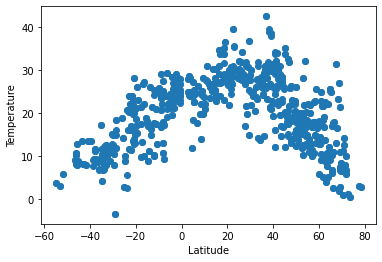

In [77]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_detail['Lat'],
y_values = weather_detail['Max_Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig(r"C:\Users\kerry\DataBootCamp\python-api-challenge\WeatherPy\Images\Lat_vs_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

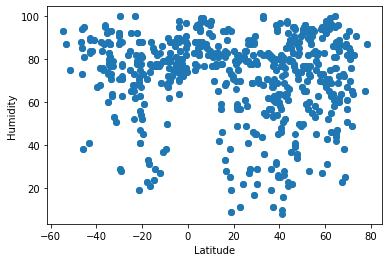

In [78]:
# Create a Scatter Plot for latitude vs humidity
x_values = weather_detail['Lat'],
y_values = weather_detail['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig(r"C:\Users\kerry\DataBootCamp\python-api-challenge\WeatherPy\Images\Lat_vs_Hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

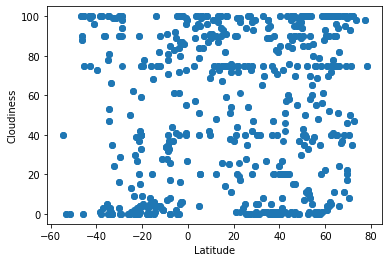

In [79]:
# Create a Scatter Plot for latitude vs cloudiness
x_values = weather_detail['Lat'],
y_values = weather_detail['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig(r"C:\Users\kerry\DataBootCamp\python-api-challenge\WeatherPy\Images\Lat_vs_Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

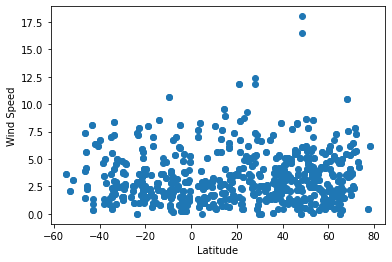

In [80]:
# Create a Scatter Plot for latitude vs wind speed
x_values = weather_detail['Lat'],
y_values = weather_detail['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig(r"C:\Users\kerry\DataBootCamp\python-api-challenge\WeatherPy\Images\Lat_vs_Wind.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


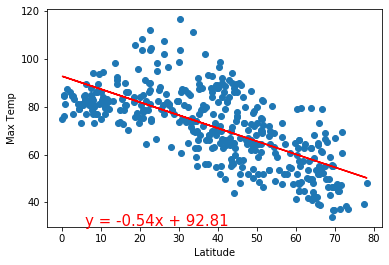

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


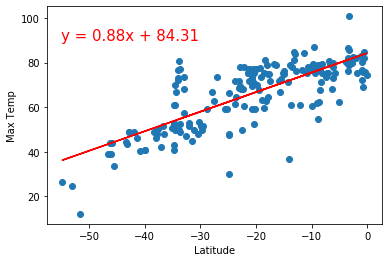

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


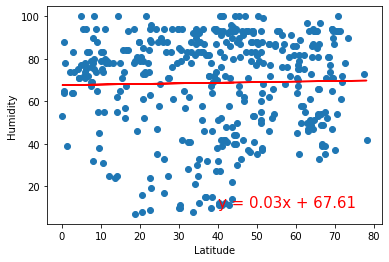

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


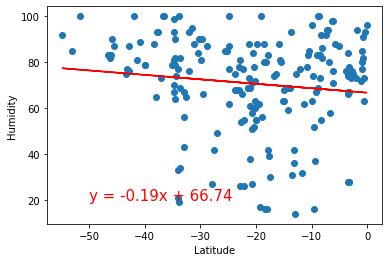

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


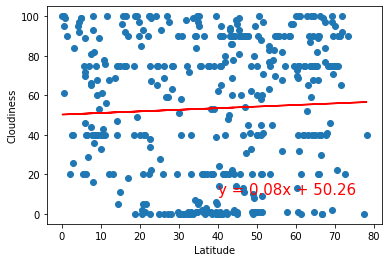

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


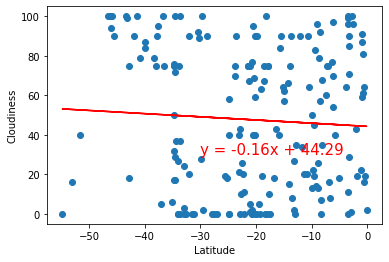

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


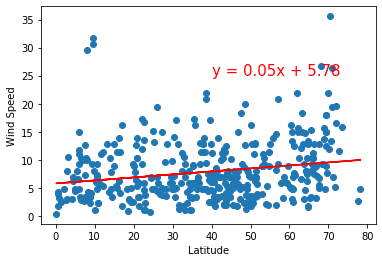

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


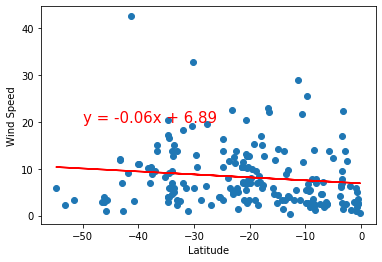